In [1]:
import scanpy as sc
import scFates as scf

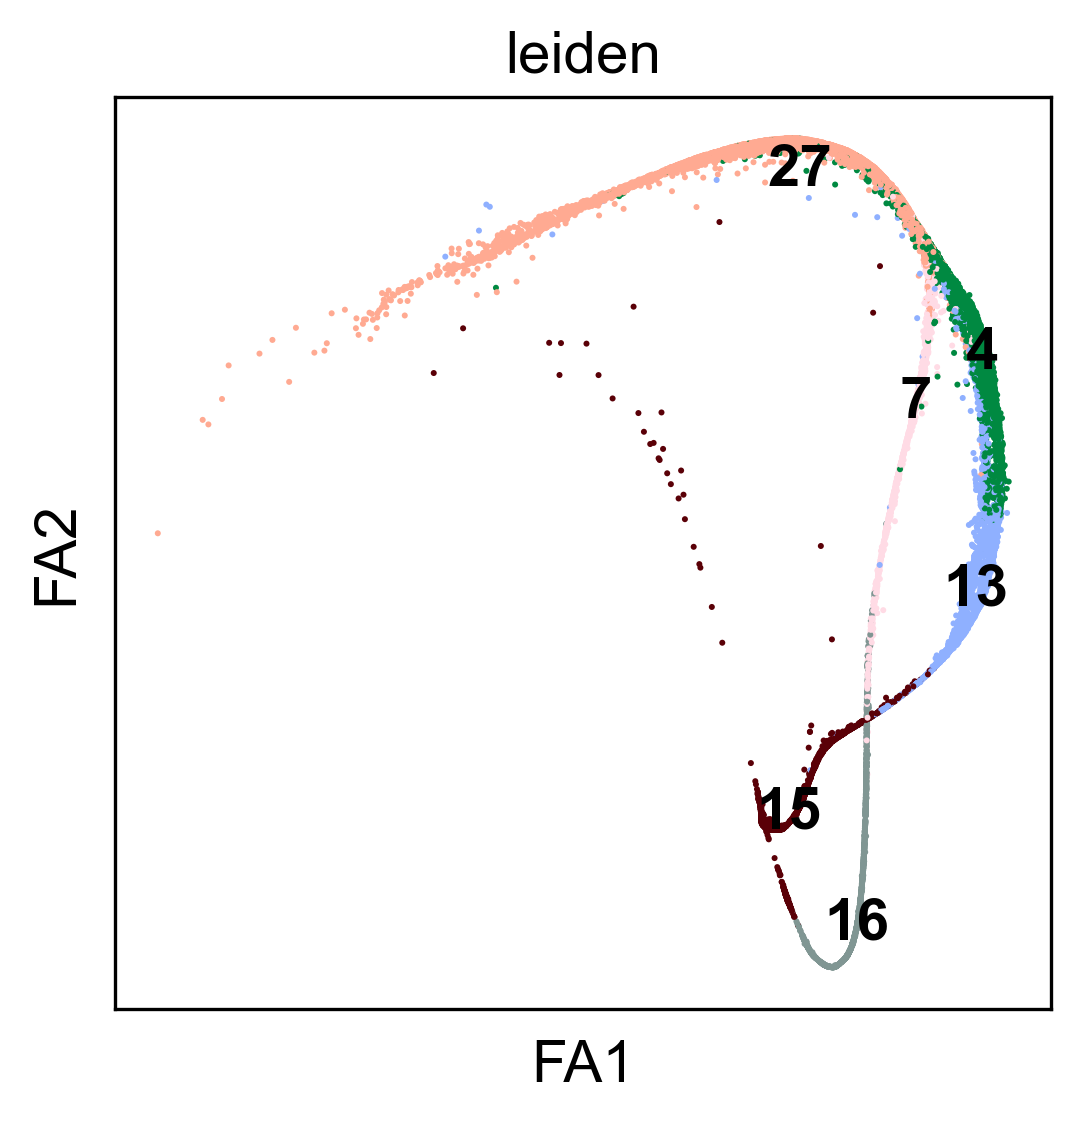

In [2]:
sc.set_figure_params(dpi=150)
adata=sc.read("adata_preprocess.h5ad")
sc.pl.draw_graph(adata,color="leiden",legend_loc="on data")

In [3]:
adata=adata[adata.obs.batch=="Waterston_300_minutes"]

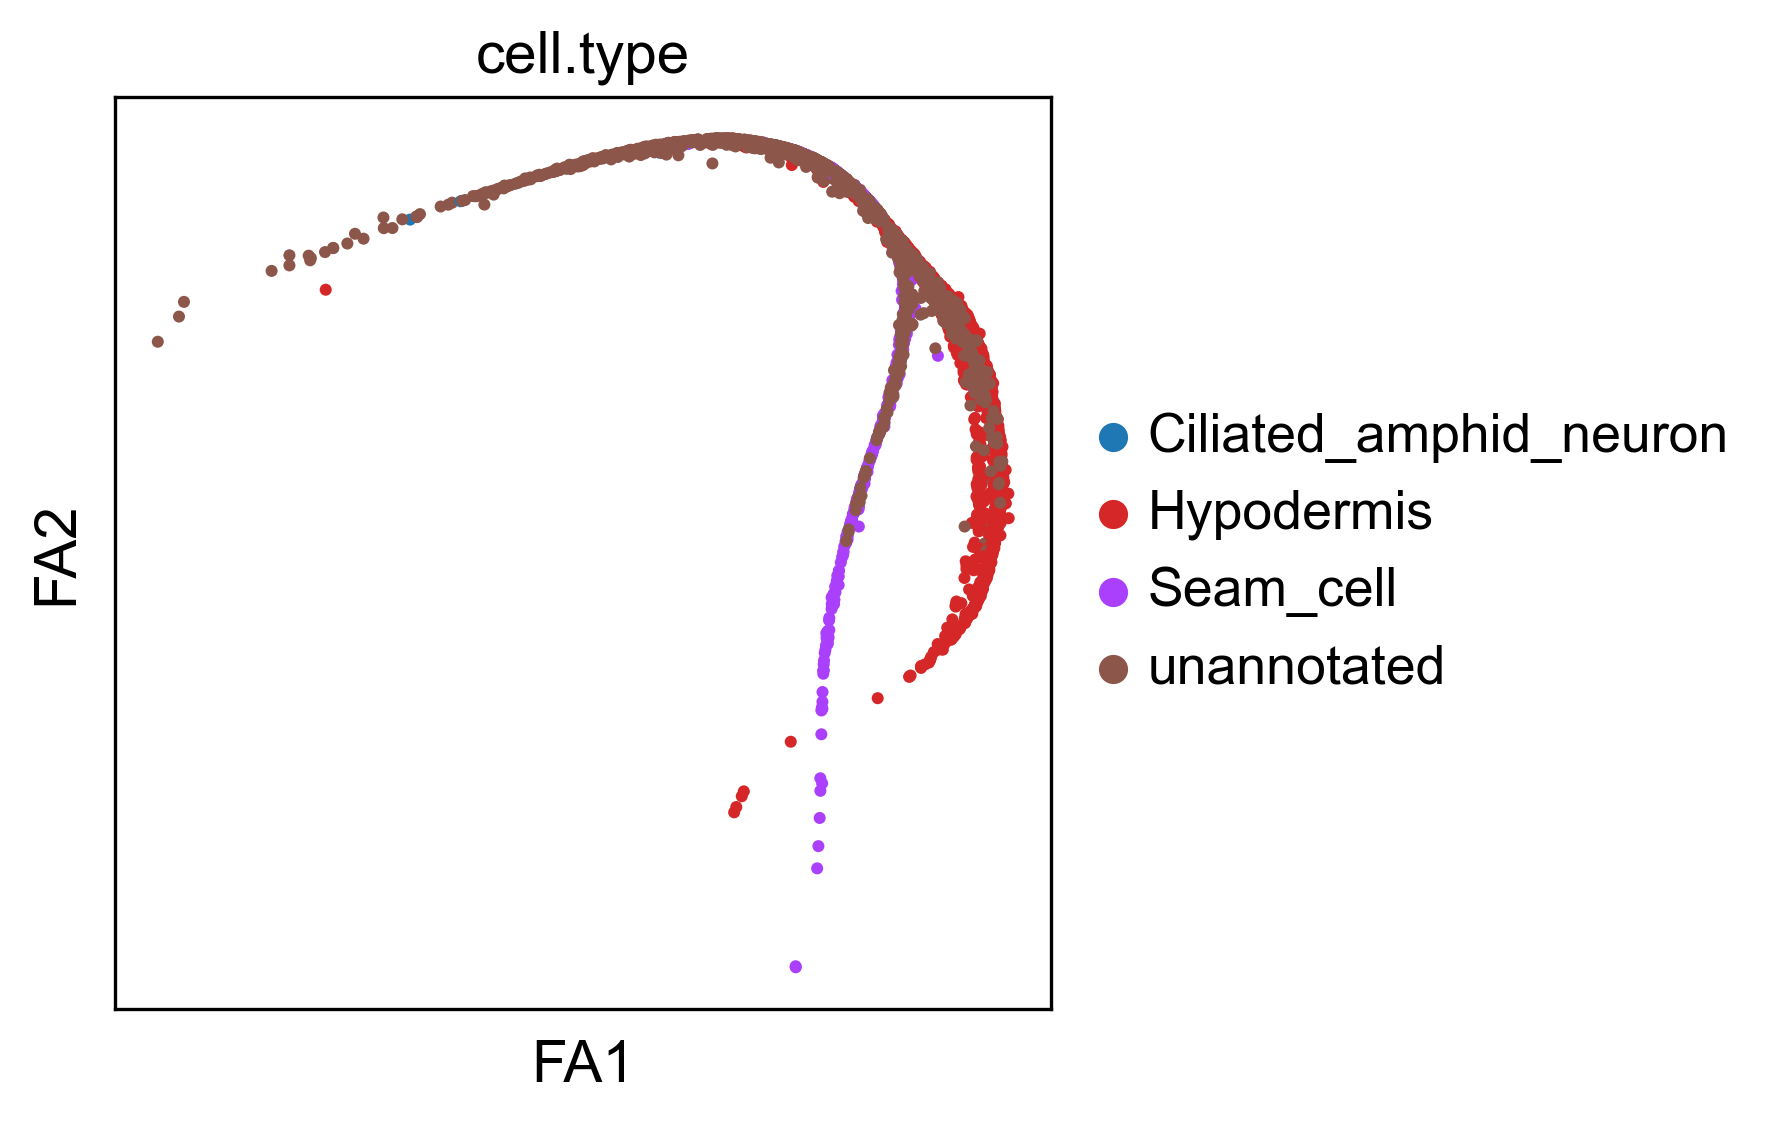

In [4]:
sc.pl.draw_graph(adata,color="cell.type")

In [13]:
scf.tl.tree(adata,Nodes=500,method='ppt',device='gpu',use_rep='X_diffusion_multiscale',seed=42,ppt_sigma=.1,ppt_lambda=10)

inferring a principal tree inferring a principal tree --> parameters used 
    500 principal points, sigma = 0.1, lambda = 10, metric = euclidean
    fitting:  88%|████████▊ | 44/50 [00:01<00:00, 22.71it/s]
    converged
    finished (0:00:02) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


    graph cleaned --> removed 11 principal points


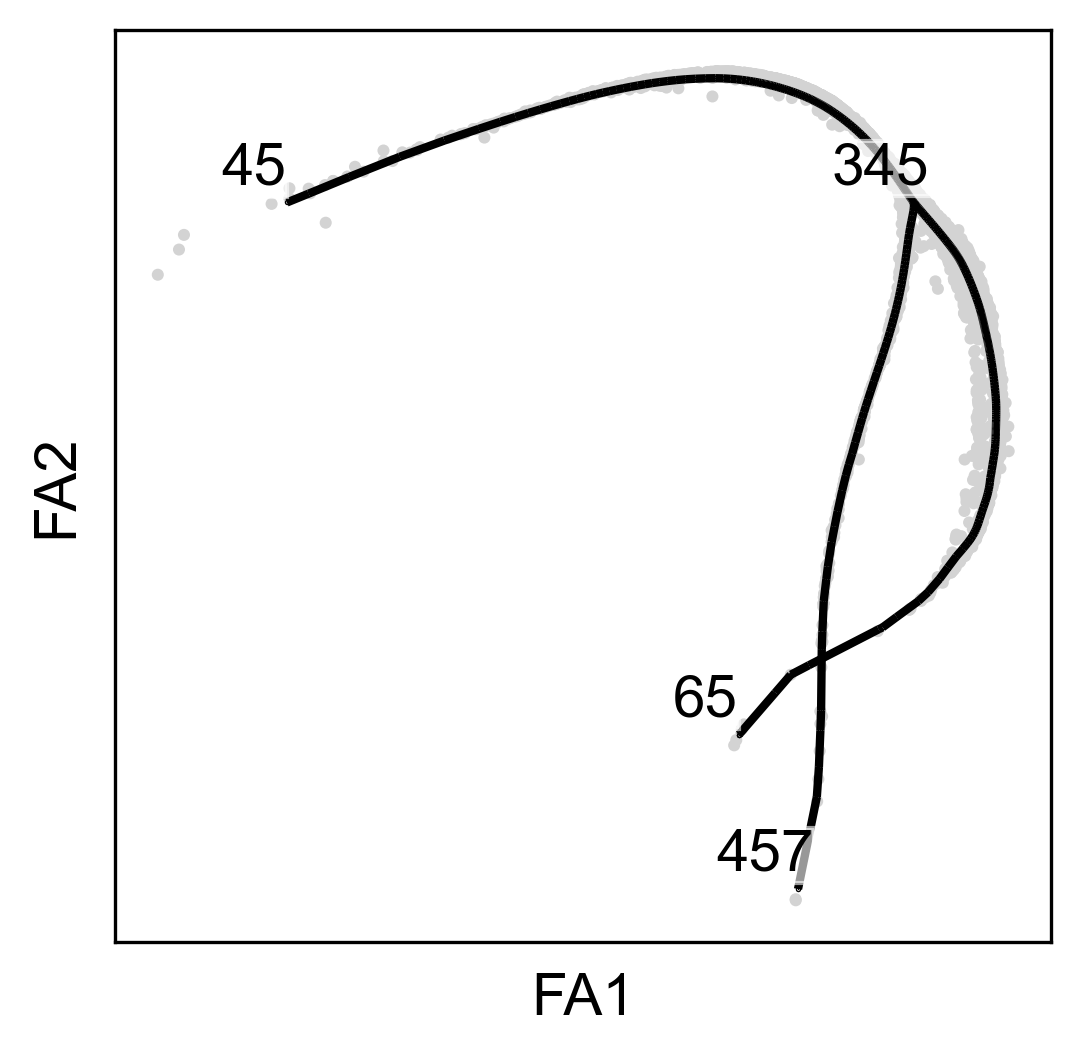

In [15]:
scf.tl.cleanup(adata,minbranchlength=20)
scf.pl.graph(adata,basis='draw_graph_fa',size_nodes=.1)

In [16]:
scf.tl.root(adata,45)

node 45 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [17]:
scf.tl.pseudotime(adata,n_jobs=80,n_map=100)

projecting cells onto the principal graph
    mappings: 100%|██████████| 100/100 [00:47<00:00,  2.12it/s]
    finished (0:00:49) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


In [18]:
sc.pp.filter_genes(adata,min_cells=3)

In [19]:
scf.tl.test_association(adata,n_jobs=40)

test features for association with the trajectory
    single mapping : 100%|██████████| 11925/11925 [02:24<00:00, 82.45it/s]
    found 2420 significant features (0:02:24) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


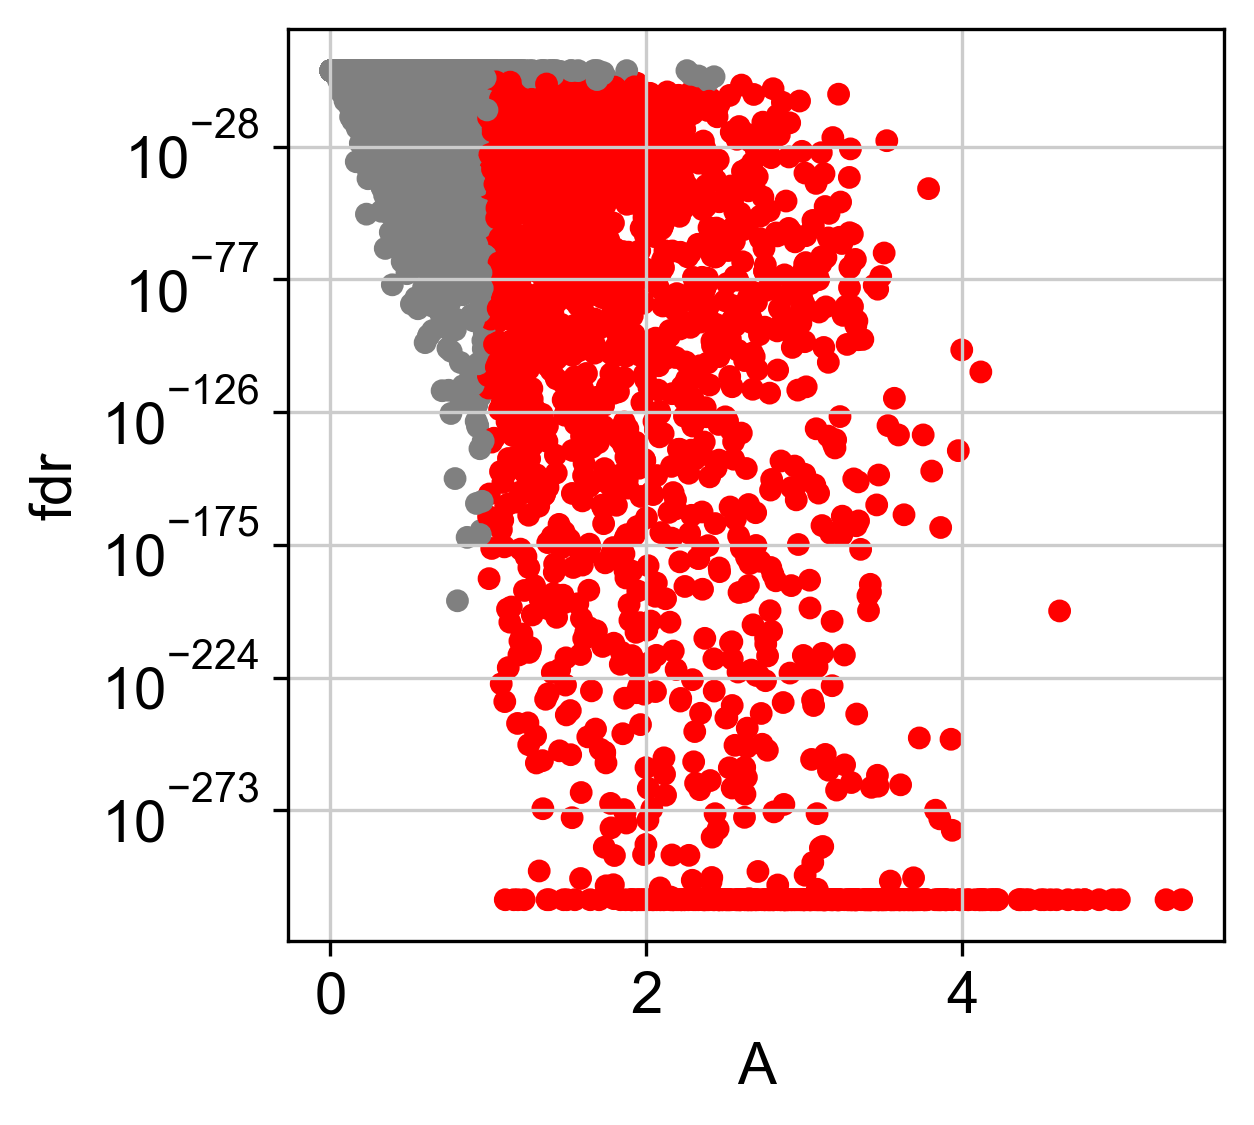

In [20]:
scf.pl.test_association(adata)

In [21]:
scf.tl.fit(adata,n_jobs=40)

fit features associated with the trajectory
    single mapping : 100%|██████████| 2420/2420 [00:48<00:00, 49.51it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:51) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


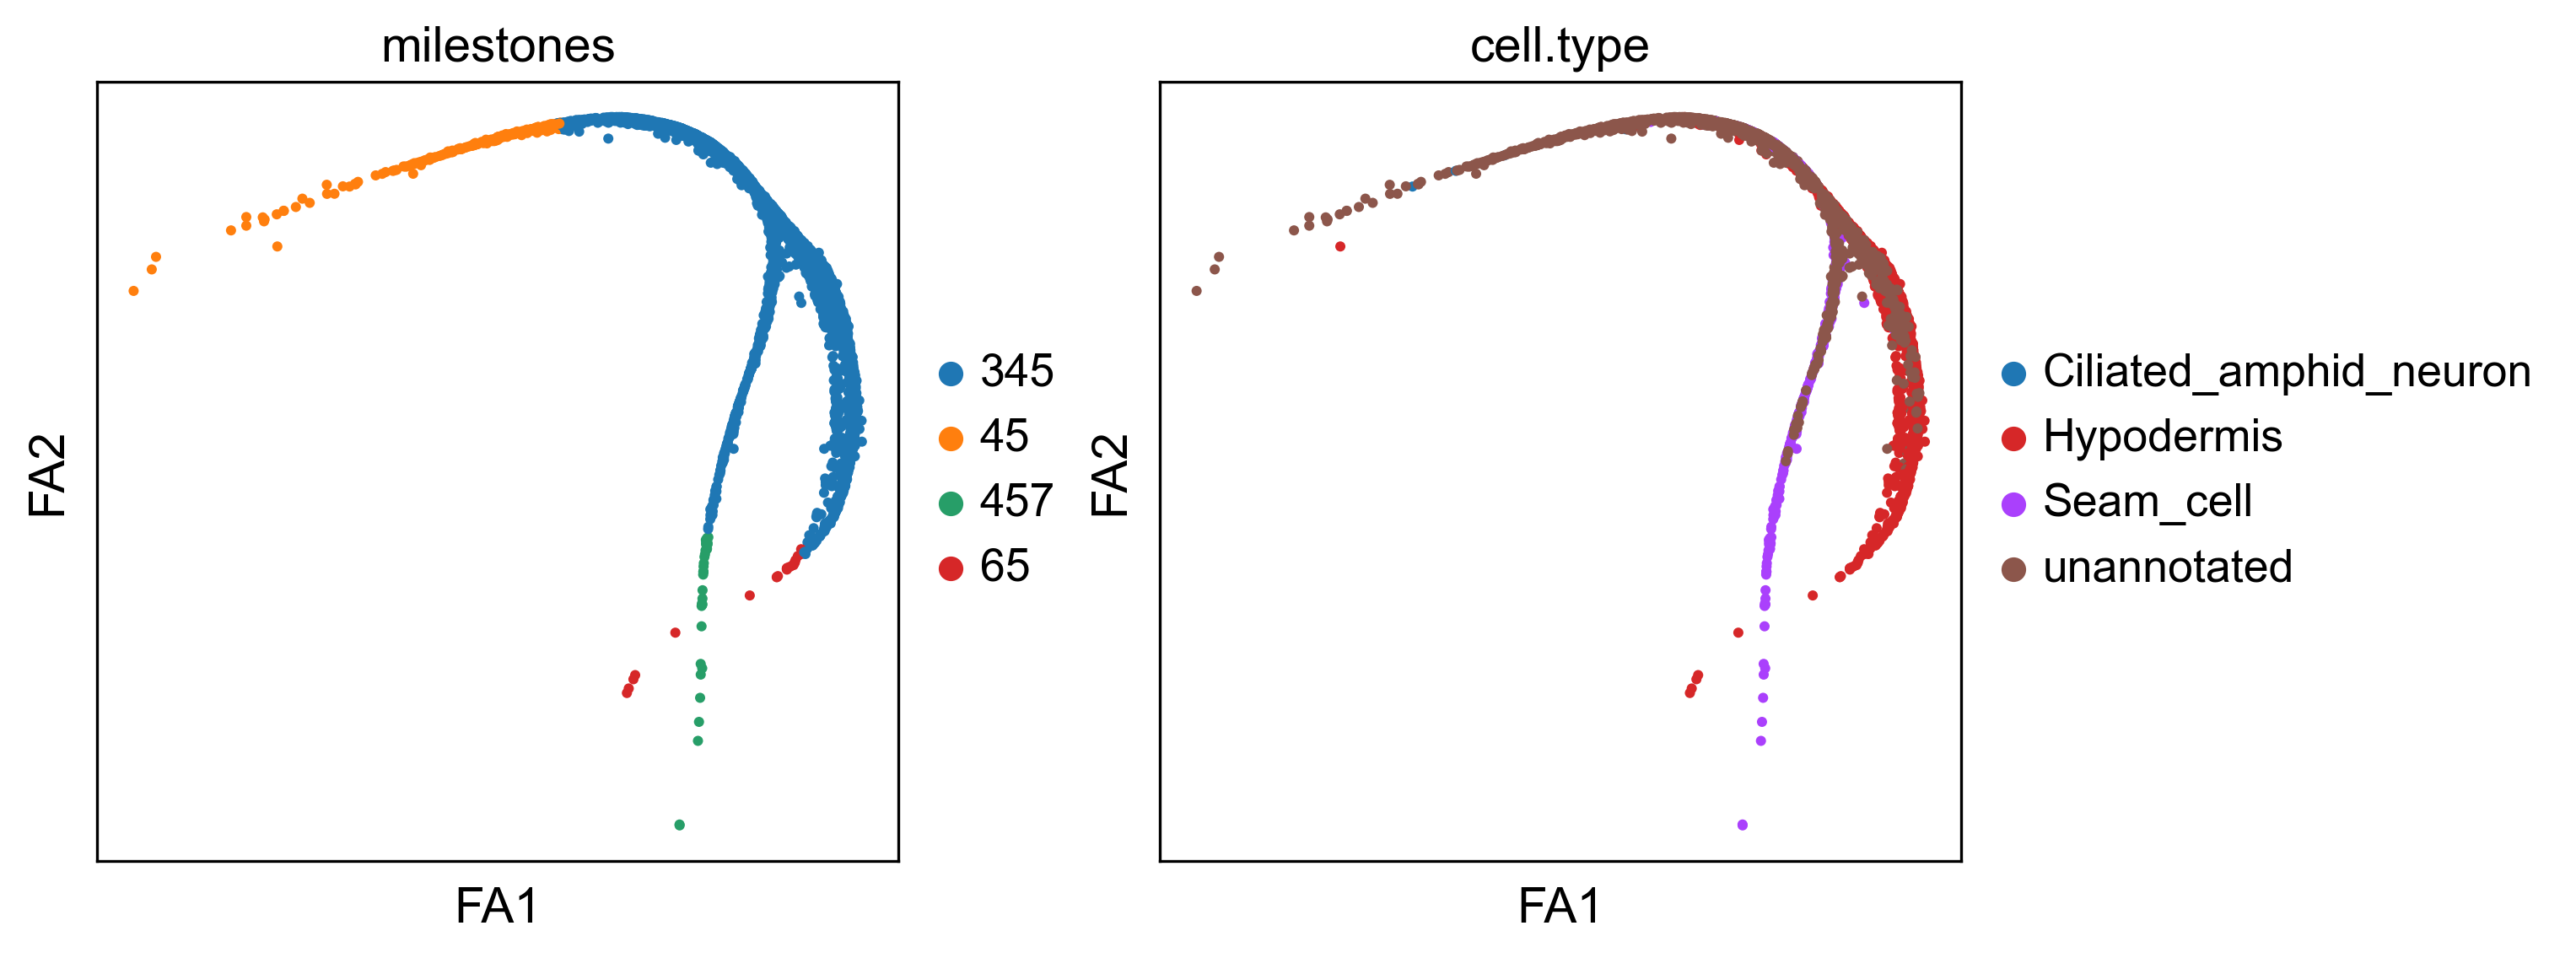

In [22]:
sc.pl.draw_graph(adata,color=["milestones",'cell.type'])

In [26]:
scf.tl.rename_milestones(adata,["bifurcation","Progenitors","Seam_cells","Hypodermis",])

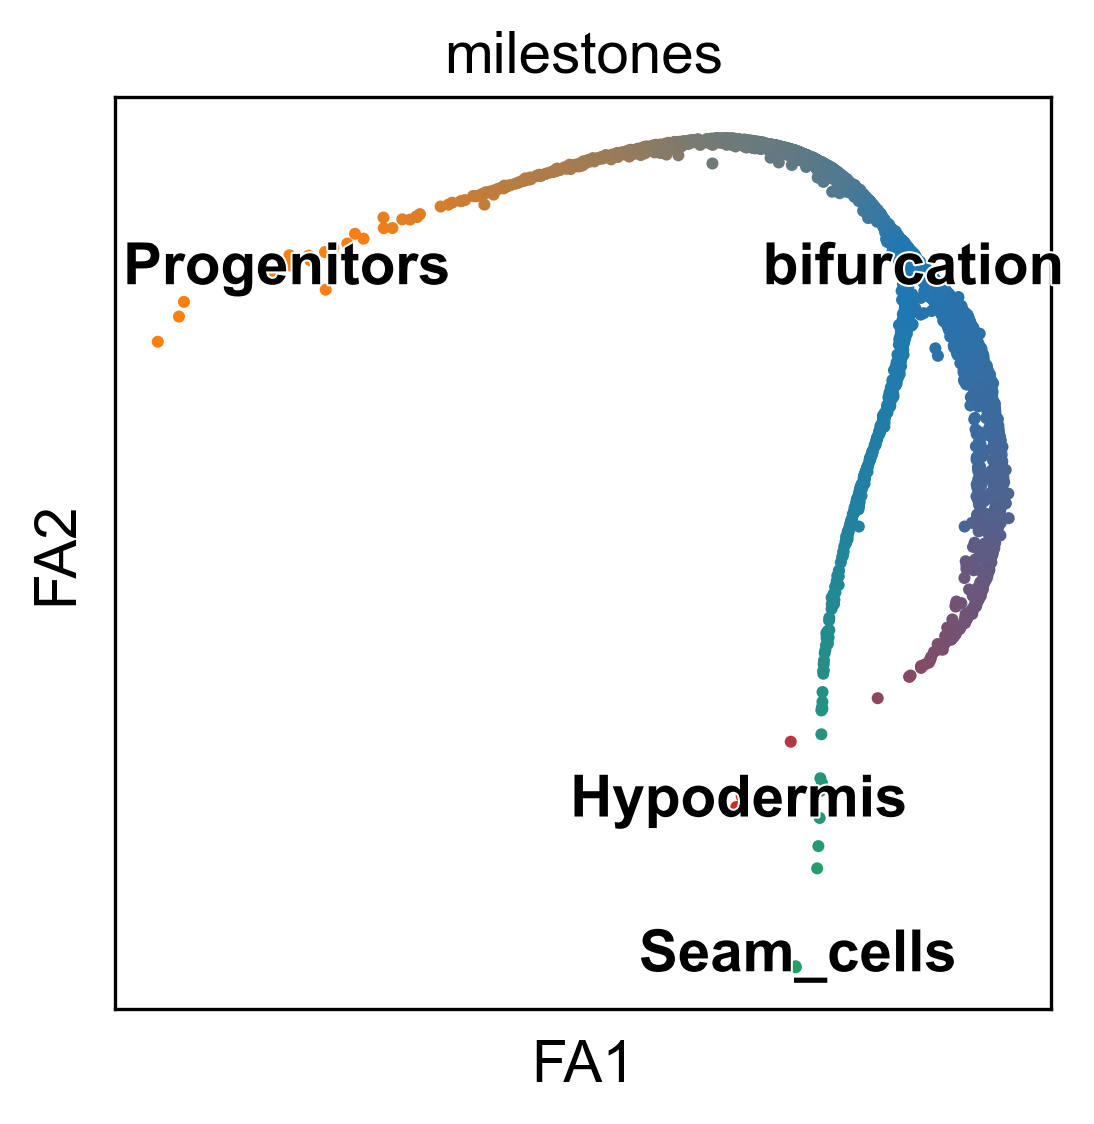

In [28]:
scf.pl.milestones(adata,annotate=True)

In [29]:
adata.write("adata_tree.h5ad")